# Stage II: Task 2: Member

In [153]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from numpy import random
from IPython.display import HTML, display
from scipy.stats.distributions import gamma
import statsmodels.api as sm
import plotly.express as px
import plotly
import plotly.graph_objs as go
from patsy import dmatrices
import plotly.tools as tls

%matplotlib inline


In [154]:
import os

if not os.path.exists("images"):
    os.mkdir("images")

# Get dataset of states that was created in other notebook

In [155]:
# get state cases and deaths dataset from previous notebook 
# Dataset already normalized per 1 million population
MyStateCases  = pd.read_csv("Data/State_cases.csv").set_index('Date')
MyStateDeaths = pd.read_csv("Data/State_deaths.csv").set_index('Date')
Read = pd.read_csv("../../../data/output/covid.csv")
df = Read.drop(["countyFIPS","stateFIPS","Unnamed: 0"], axis=1)

In [156]:
MyStateCases = MyStateCases.fillna(0)
MyStateDeaths = MyStateDeaths.fillna(0)

print(MyStateCases.tail())
print(MyStateDeaths.tail())

               CA     FL     NC     NY     PA     TX
Date                                                
2020-10-17   50.0  188.0  198.0   92.0  145.0  175.0
2020-10-18   35.0  118.0  219.0   71.0  108.0  200.0
2020-10-19  121.0   79.0  112.0   51.0   78.0   88.0
2020-10-20  101.0  170.0  151.0   62.0  122.0  175.0
2020-10-21   86.0  104.0    0.0  104.0  111.0  188.0
             CA   FL   NC   NY   PA   TX
Date                                    
2020-10-17  1.0  4.0  2.0  1.0  1.0  3.0
2020-10-18  1.0  2.0  1.0  1.0  0.0  1.0
2020-10-19  1.0  2.0  0.0  1.0  3.0  0.0
2020-10-20  1.0  4.0  5.0  1.0  3.0  2.0
2020-10-21  4.0  5.0  0.0  0.0  2.0  4.0


In [157]:
MyStateCases.TX.describe()

count    274.000000
mean     107.094891
std      115.001569
min        0.000000
25%       13.250000
50%       58.000000
75%      175.000000
max      671.000000
Name: TX, dtype: float64

Text(0.5, 1.0, 'Texas Histogram of New Cases')

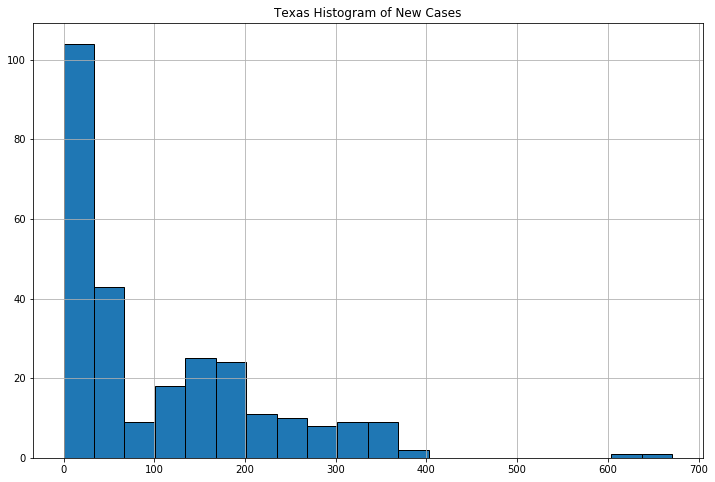

In [289]:
MyStateCases.TX.hist(bins=20, ec='black', figsize=(12,8))
plt.title('Texas Histogram of New Cases')

## 1. Data is skewed, with longer tail to the right. 
## 2. Data is discrete

In [300]:
#look at mean of state of texas
MyStateCases_mean = MyStateCases.mean().round(0)
MyStateCases_mean 

CA     82.0
FL    129.0
NC     87.0
NY     92.0
PA     53.0
TX    107.0
dtype: float64

In [307]:
MyStateDeaths_mean = MyStateDeaths.mean().round(0)
MyStateDeaths_mean 

CA    2.0
FL    3.0
NC    1.0
NY    6.0
PA    2.0
TX    2.0
dtype: float64

## Method to plot a Poisson Distribution. 

In [298]:
def Plot_poisson(df, col='StateOrCounty', title = 'Title'):
    random.seed(12)
    lm = df[col].mean()
    df_size = df.size
    Count = stats.poisson.rvs(size=df_size,  # Generate Poisson data
                                   mu=lm ) 
    pd.DataFrame(Count).hist(density=True, range=(min(Count)-0.5,max(Count)+0.5)
                                    , bins=max(Count)+1, ec ='black');
    plt.title(title)
    plt.ylabel("Probability")
    plt.xlabel("X")

## Fit number of new COVID-19 cases of Texas to a Poisson Distribution. 

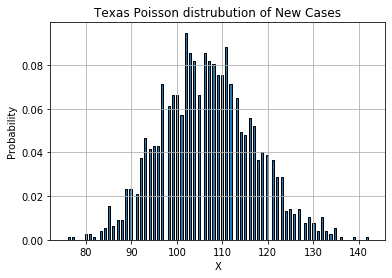

In [299]:
Plot_poisson(MyStateCases, col='TX', title = 'Texas Poisson distrubution of New Cases')


## Why distrubution was chosen:
### - Poission Distrubution was chosen because first, we have discrete values. 
### - We cannot have continuous values as cases are a set number value. We cannot have half of a case, it has to be a whole integer.
### - Second, we chose this disturbution because it is a good anaylsis to see the probability of a number of new cases happening in a day 

## Analysis of distribution statistics:
### - From the graph above, It shows that the higher probability of number of new cases in a day is between 80-130 cases. 

# Model a poission distribution of COVID-19 Cases and Deaths of a state and 5 other states per 1 million population. 

In [306]:
# look at all states that we will compare with texas in dataset. 
print(MyStateCases.tail())
print(MyStateDeaths.tail())

               CA     FL     NC     NY     PA     TX
Date                                                
2020-10-17   50.0  188.0  198.0   92.0  145.0  175.0
2020-10-18   35.0  118.0  219.0   71.0  108.0  200.0
2020-10-19  121.0   79.0  112.0   51.0   78.0   88.0
2020-10-20  101.0  170.0  151.0   62.0  122.0  175.0
2020-10-21   86.0  104.0    0.0  104.0  111.0  188.0
             CA   FL   NC   NY   PA   TX
Date                                    
2020-10-17  1.0  4.0  2.0  1.0  1.0  3.0
2020-10-18  1.0  2.0  1.0  1.0  0.0  1.0
2020-10-19  1.0  2.0  0.0  1.0  3.0  0.0
2020-10-20  1.0  4.0  5.0  1.0  3.0  2.0
2020-10-21  4.0  5.0  0.0  0.0  2.0  4.0


## Plot Poisson Distribution of New Cases for all States
### (already normalized per 1 million population). 

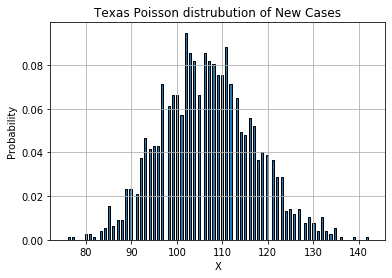

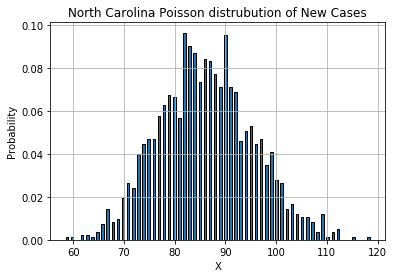

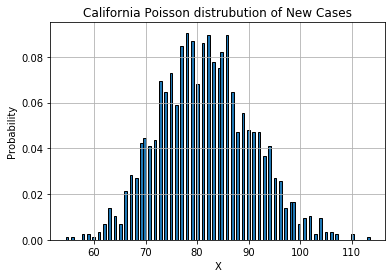

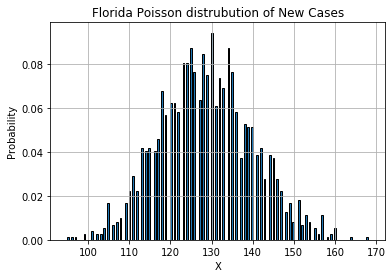

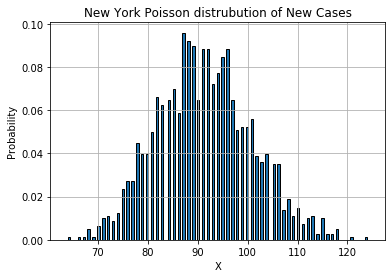

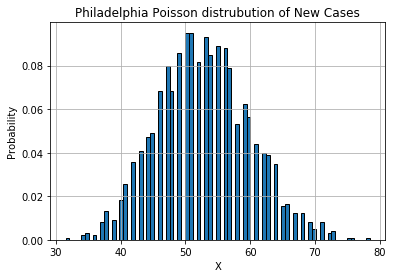

In [305]:
Plot_poisson(MyStateCases, col='TX', title = 'Texas Poisson distrubution of New Cases')
Plot_poisson(MyStateCases, col='NC', title = 'North Carolina Poisson distrubution of New Cases')
Plot_poisson(MyStateCases, col='CA', title = 'California Poisson distrubution of New Cases')
Plot_poisson(MyStateCases, col='FL', title = 'Florida Poisson distrubution of New Cases')
Plot_poisson(MyStateCases, col='NY', title = 'New York Poisson distrubution of New Cases')
Plot_poisson(MyStateCases, col='PA', title = 'Philadelphia Poisson distrubution of New Cases')

## Plot Poisson Distribution of New Deaths for all States
### (already normalized per 1 million population). 

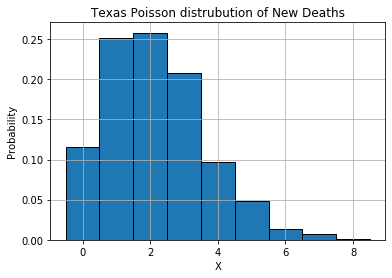

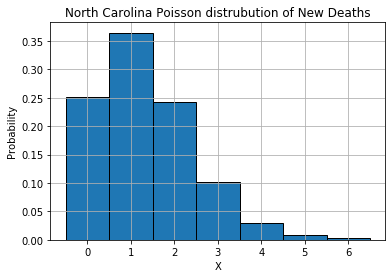

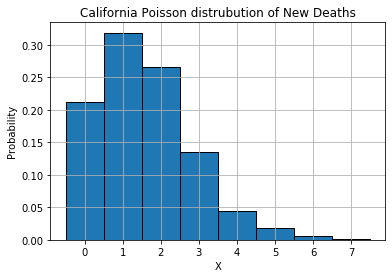

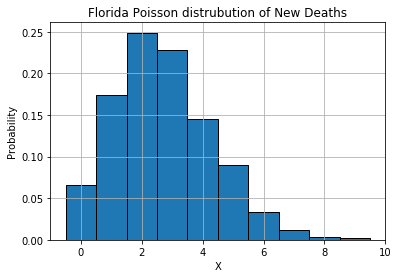

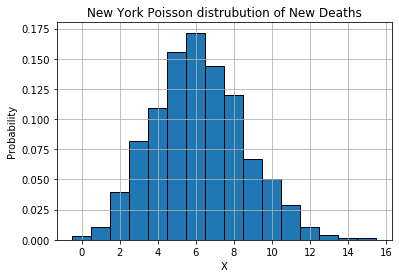

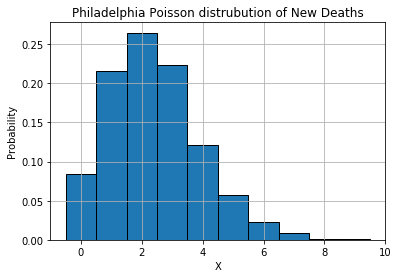

In [309]:
Plot_poisson(MyStateDeaths, col='TX', title = 'Texas Poisson distrubution of New Deaths')
Plot_poisson(MyStateDeaths, col='NC', title = 'North Carolina Poisson distrubution of New Deaths')
Plot_poisson(MyStateDeaths, col='CA', title = 'California Poisson distrubution of New Deaths')
Plot_poisson(MyStateDeaths, col='FL', title = 'Florida Poisson distrubution of New Deaths')
Plot_poisson(MyStateDeaths, col='NY', title = 'New York Poisson distrubution of New Deaths')
Plot_poisson(MyStateDeaths, col='PA', title = 'Philadelphia Poisson distrubution of New Deaths')

# Model a poission distribution of COVID-19 Cases and Deaths for top 5 infected North Carolina counties per 200,000 population. 

### Identify top 5 infected counties of North Carolina. 

In [32]:
NC = df.loc[df['State']=='NC']
NC = NC.set_index('County Name')

#look for recent day to see total amount of cases and order the values to see counties with high case and death rates. 
NC

NC_cases = NC.filter(regex = "x")
NC_deaths = NC.filter(regex = "y").drop(["County Name_y"], axis=1)

In [33]:
#display last row which is the total cases 
LastRowCase = NC_cases.iloc[:,-1:]


#Have last row be renamed to total cases 
TotalCases = LastRowCase.rename(columns={list(LastRowCase)[0]: 'Total Cases'})


#print top 5 counties of cases in North Carolina
print(TotalCases.sort_values(by = ['Total Cases'], ascending = False).head(5))

#results will be our five counties that we will work with. 

                    Total Cases
County Name                    
Mecklenburg County        32038
Wake County               19952
Guilford County           10571
Durham County              8631
Forsyth County             8201


In [34]:
#Find population of the top 5 infected counties. 

array = ['Mecklenburg County','Wake County','Guilford County','Durham County', 'Forsyth County']

CountyPop = NC.loc[NC.index.isin(array)]


#get Population value of counties to use later on when normalizing. 
Mecklenburg_Pop = CountyPop.iloc[3][1]
Wake_Pop = CountyPop.iloc[4][1]
Guilford_Pop = CountyPop.iloc[2][1]
Durham_Pop = CountyPop.iloc[0][1]
Forsyth_Pop = CountyPop.iloc[1][1]


In [35]:
Counties_Cases = NC_cases.loc[NC_cases.index.isin(array)].T.rename_axis('Date')
Counties_Deaths = NC_deaths.loc[NC_deaths.index.isin(array)].T.rename_axis('Date')

#change date format for cases
NC_Counties_Cases  = Counties_Cases .T.rename(columns=lambda x: (pd.to_datetime(x.split('_')[0], errors= 'ignore')), errors='raise').T
print(NC_Counties_Cases.tail())

#change date format for deaths
NC_Counties_Deaths  = Counties_Deaths.T.rename(columns=lambda x: (pd.to_datetime(x.split('_')[0], errors= 'ignore')), errors='raise').T
print(NC_Counties_Deaths .tail())

County Name  Durham County  Forsyth County  Guilford County  \
Date                                                          
2020-10-17            8508            8049            10357   
2020-10-18            8567            8131            10438   
2020-10-19            8590            8155            10514   
2020-10-20            8631            8201            10571   
2020-10-21            8631            8201            10571   

County Name  Mecklenburg County  Wake County  
Date                                          
2020-10-17                31442        19668  
2020-10-18                31688        19801  
2020-10-19                31820        19888  
2020-10-20                32038        19952  
2020-10-21                32038        19952  
County Name  Durham County  Forsyth County  Guilford County  \
Date                                                          
2020-10-17              97             111              192   
2020-10-18              97             1

In [36]:
#Calculates differences of cases and deaths of each day (New Cases & New Deaths)
New_NC_Counties_Cases = NC_Counties_Cases.diff()
New_NC_Counties_Deaths = NC_Counties_Deaths.diff()

print(New_NC_Counties_Cases.tail())
print(New_NC_Counties_Deaths.tail())

County Name  Durham County  Forsyth County  Guilford County  \
Date                                                          
2020-10-17            24.0            81.0             71.0   
2020-10-18            59.0            82.0             81.0   
2020-10-19            23.0            24.0             76.0   
2020-10-20            41.0            46.0             57.0   
2020-10-21             0.0             0.0              0.0   

County Name  Mecklenburg County  Wake County  
Date                                          
2020-10-17                163.0         85.0  
2020-10-18                246.0        133.0  
2020-10-19                132.0         87.0  
2020-10-20                218.0         64.0  
2020-10-21                  0.0          0.0  
County Name  Durham County  Forsyth County  Guilford County  \
Date                                                          
2020-10-17             0.0             1.0              0.0   
2020-10-18             0.0             0

In [323]:
#calculate and Normalize dataset to cases per 200,000 people. 
norm_val = 500_000

#Normalize cases
Norm_MyNCCases = New_NC_Counties_Cases.assign(Durham_County = lambda x: (x['Durham County'] / Durham_Pop) * norm_val).round(0)
Norm_MyNCCases = Norm_MyNCCases.assign(Forsyth_County = lambda x: (x['Forsyth County'] / Forsyth_Pop) * norm_val).round(0)
Norm_MyNCCases = Norm_MyNCCases.assign(Guilford_County = lambda x: (x['Guilford County'] / Guilford_Pop) * norm_val).round(0)
Norm_MyNCCases = Norm_MyNCCases.assign(MeckenBurg_County = lambda x: (x['Mecklenburg County'] / Mecklenburg_Pop) * norm_val).round(0)
Norm_MyNCCases = Norm_MyNCCases.assign(Wake_County = lambda x: (x['Wake County'] / Wake_Pop) * norm_val).round(0)


#Normalize deaths 
Norm_MyNCDeaths = New_NC_Counties_Deaths.assign(Durham_County = lambda x: (x['Durham County'] / Durham_Pop) * norm_val).round(0)
Norm_MyNCDeaths = Norm_MyNCDeaths.assign(Forsyth_County = lambda x: (x['Forsyth County'] / Forsyth_Pop) * norm_val).round(0)
Norm_MyNCDeaths = Norm_MyNCDeaths.assign(Guilford_County = lambda x: (x['Guilford County'] / Guilford_Pop) * norm_val).round(0)
Norm_MyNCDeaths = Norm_MyNCDeaths.assign(MeckenBurg_County = lambda x: (x['Mecklenburg County'] / Mecklenburg_Pop) * norm_val).round(0)
Norm_MyNCDeaths = Norm_MyNCDeaths.assign(Wake_County = lambda x: (x['Wake County'] / Wake_Pop) * norm_val).round(0)

MyNCCases = Norm_MyNCCases.drop(['Durham County','Forsyth County','Guilford County','Mecklenburg County', 'Wake County'], axis=1)
MyNCDeaths = Norm_MyNCDeaths.drop(['Durham County','Forsyth County','Guilford County','Mecklenburg County', 'Wake County'], axis=1)

print(MyNCCases.tail())
print(MyNCDeaths.tail())  

County Name  Durham_County  Forsyth_County  Guilford_County  \
Date                                                          
2020-10-17            37.0           106.0             66.0   
2020-10-18            92.0           107.0             75.0   
2020-10-19            36.0            31.0             71.0   
2020-10-20            64.0            60.0             53.0   
2020-10-21             0.0             0.0              0.0   

County Name  MeckenBurg_County  Wake_County  
Date                                         
2020-10-17                73.0         38.0  
2020-10-18               111.0         60.0  
2020-10-19                59.0         39.0  
2020-10-20                98.0         29.0  
2020-10-21                 0.0          0.0  
County Name  Durham_County  Forsyth_County  Guilford_County  \
Date                                                          
2020-10-17             0.0             1.0              0.0   
2020-10-18             0.0             0.0     

## Plot Poisson Distribution of New Cases for North Carolina Counties.

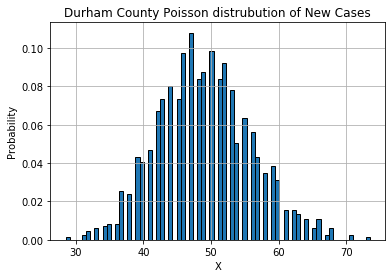

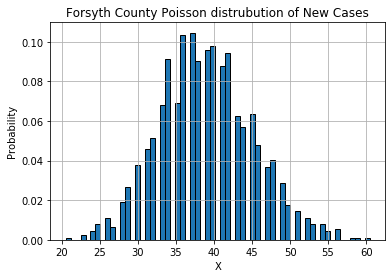

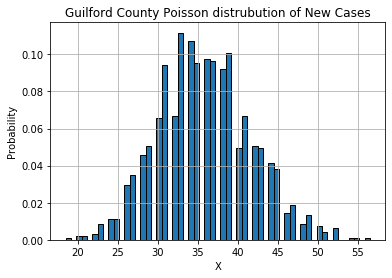

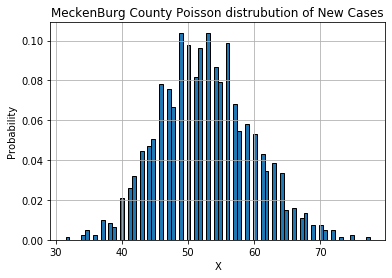

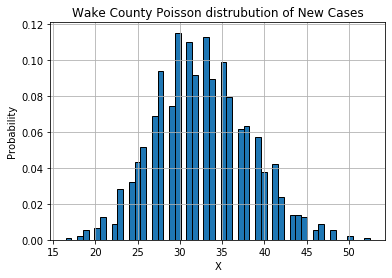

In [324]:
Plot_poisson(MyNCCases, col='Durham_County', title = 'Durham County Poisson distrubution of New Cases')
Plot_poisson(MyNCCases, col='Forsyth_County', title = 'Forsyth County Poisson distrubution of New Cases')
Plot_poisson(MyNCCases, col='Guilford_County', title = 'Guilford County Poisson distrubution of New Cases')
Plot_poisson(MyNCCases, col='MeckenBurg_County', title = 'MeckenBurg County Poisson distrubution of New Cases')
Plot_poisson(MyNCCases, col='Wake_County', title = 'Wake County Poisson distrubution of New Cases')

## Plot Poisson Distribution of New deaths for North Carolina Counties.

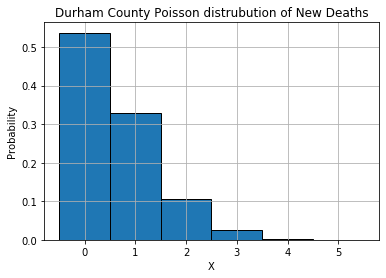

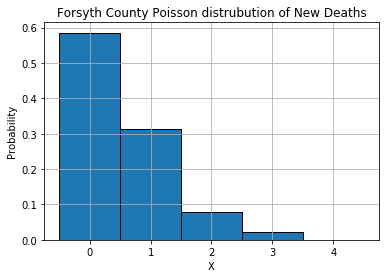

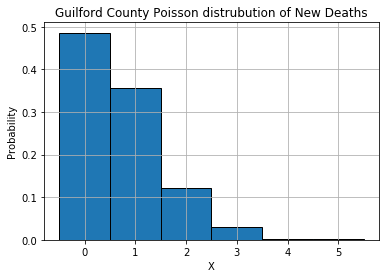

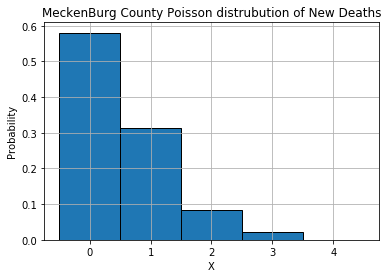

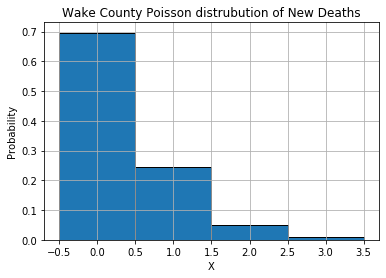

In [326]:
Plot_poisson(MyNCDeaths, col='Durham_County', title = 'Durham County Poisson distrubution of New Deaths')
Plot_poisson(MyNCDeaths, col='Forsyth_County', title = 'Forsyth County Poisson distrubution of New Deaths')
Plot_poisson(MyNCDeaths, col='Guilford_County', title = 'Guilford County Poisson distrubution of New Deaths')
Plot_poisson(MyNCDeaths, col='MeckenBurg_County', title = 'MeckenBurg County Poisson distrubution of New Deaths')
Plot_poisson(MyNCDeaths, col='Wake_County', title = 'Wake County Poisson distrubution of New Deaths')

# Perform Correlation between Enrichment data valuables and COVID-19 Cases

In [315]:
read = pd.read_csv("../../../data/output/COVID19_HOSBEDS_MERGE.csv")

In [316]:
df2 = read.drop(["countyFIPS","stateFIPS","Unnamed: 0"], axis=1)
df2 = df2.drop(df.loc[df['County Name'] == "Statewide Unallocated"].index)

In [317]:
Enrich_States = df2.groupby(['State']).sum()
Enrich_States.head()

,population,1/22/20_x,1/23/20_x,1/24/20_x,1/25/20_x,1/26/20_x,1/27/20_x,1/28/20_x,1/29/20_x,1/30/20_x,...,10/20/20_y,10/21/20_y,NUM_LICENSED_BEDS,NUM_STAFFED_BEDS,NUM_ICU_BEDS,ADULT_ICU_BEDS,PEDI_ICU_BEDS,BED_UTILIZATION,Potential_Increase_In_Bed_Capac,AVG_VENTILATOR_USAGE
State,,,,,,,,,,,,,,,,,,,,,
AK,731545,0,0,0,0,0,0,0,0,0,...,67,68,1832.0,1532.0,193.0,193.0,76.0,8.963031,300.0,41.0
AL,4903185,0,0,0,0,0,0,0,0,0,...,2804,2828,18611.0,15138.0,1637.0,1637.0,569.0,52.147326,3473.0,383.0
AR,3017804,0,0,0,0,0,0,0,0,0,...,1727,1751,12729.0,10012.0,914.0,914.0,247.0,42.606742,2717.0,261.0
AZ,7278717,0,0,0,0,1,1,1,1,1,...,5837,5854,18345.0,15695.0,1882.0,1882.0,532.0,56.815879,2650.0,427.0
CA,39512223,0,0,0,0,2,3,3,4,4,...,17049,17214,83240.0,77808.0,8652.0,8652.0,3858.0,216.458434,5432.0,1986.0


In [318]:
MyVar = Enrich_States[['population','10/21/20_x','NUM_STAFFED_BEDS','NUM_ICU_BEDS','AVG_VENTILATOR_USAGE']]
MyVar_Cases = MyVar.rename(columns ={"10/21/20_x" : "Cases"})
MyVar_Cases.head()

,population,Cases,NUM_STAFFED_BEDS,NUM_ICU_BEDS,AVG_VENTILATOR_USAGE
State,,,,,
AK,731545,11599,1532.0,193.0,41.0
AL,4903185,175674,15138.0,1637.0,383.0
AR,3017804,99597,10012.0,914.0,261.0
AZ,7278717,233912,15695.0,1882.0,427.0
CA,39512223,886954,77808.0,8652.0,1986.0


In [319]:
Value = 500_000
Norm_Enrich = pd.DataFrame()

Norm_Enrich['Cases'] = ((MyVar_Cases['Cases'] / MyVar_Cases['population']) * Value).round(0)
Norm_Enrich['NUM_STAFFED_BEDS'] = ((MyVar_Cases['NUM_STAFFED_BEDS'] / MyVar_Cases['population']) * Value).round(0)
Norm_Enrich['NUM_ICU_BEDS'] = ((MyVar_Cases['NUM_ICU_BEDS'] / MyVar_Cases['population']) * Value).round(0)
Norm_Enrich['AVG_VENTILATOR_USAGE'] = ((MyVar_Cases['AVG_VENTILATOR_USAGE'] / MyVar_Cases['population']) * Value).round(0)




Norm_Enrich.head()

,Cases,NUM_STAFFED_BEDS,NUM_ICU_BEDS,AVG_VENTILATOR_USAGE
State,,,,
AK,7928.0,1047.0,132.0,28.0
AL,17914.0,1544.0,167.0,39.0
AR,16502.0,1659.0,151.0,43.0
AZ,16068.0,1078.0,129.0,29.0
CA,11224.0,985.0,109.0,25.0


## Does higher number of staffed beds lead to higher covid case numbers?

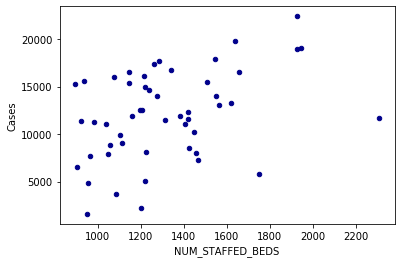

In [320]:
Staffed_Beds_Plot = Norm_Enrich.plot.scatter(x = 'NUM_STAFFED_BEDS',y ='Cases',c ='DarkBlue')

## Does higher number of ICU beds lead to higher covid case numbers?

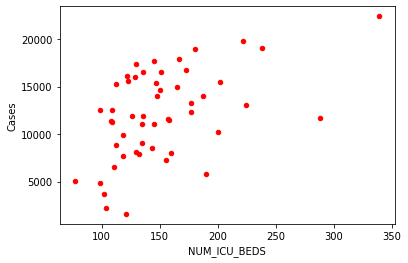

In [321]:
ICUBeds_Plot = Norm_Enrich.plot.scatter(x = 'NUM_ICU_BEDS',y ='Cases',c ='Red')

## Does higher number of average ventilator usage lead to higher covid case numbers?

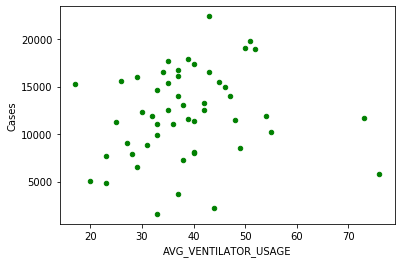

In [322]:
Vent_Plot = Norm_Enrich.plot.scatter(x = 'AVG_VENTILATOR_USAGE',y ='Cases',c ='Green')
Vent_Plot

### Correlation between cases and enrichment variables. 

In [46]:
Norm_Enrich.corr()[0:1]

,Cases,NUM_STAFFED_BEDS,NUM_ICU_BEDS,AVG_VENTILATOR_USAGE
Cases,1.0,0.400107,0.502448,0.132817


# Analysis:
## Cases and Number of ICU Beds have a high correlation between each other